In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
from cerebra_atlas_python.cerebra_mne import CerebraMNE
from cerebra_atlas_python.utils import setup_logging
from cerebra_atlas_python.plotting import figure_features
figure_features()

In [4]:
setup_logging("INFO")

In [5]:
%%time
cerebra = CerebraMNE(config_path='../cerebra_atlas_python/config.ini')

CPU times: user 3.9 ms, sys: 3.81 ms, total: 7.71 ms
Wall time: 7.56 ms


In [6]:
import numpy as np
pares = np.arange(0,62)[np.arange(0,62)%2 ==0]

In [7]:
axis_0 = [1, 3, 6, 7, 8, 9, 10, 12, 13, 16, 18, 22, 23, 24, 30, 31, 33, 35, 36, 38, 42, 43, 44, 45, 47]
axis_1= [1, 3, 7, 8, 15, 22, 23, 24, 28, 30, 32, 35, 36, 38, 42, 44, 45, 47, 52, 54, 58, 59, 66, 73, 74, 75, 79, 81, 83, 86, 87, 89, 93, 95, 96, 98]
axis_2=[1, 6, 7, 8, 9, 10, 12, 13, 14, 22, 23, 28, 30, 31, 32, 33, 34, 35, 38, 42, 43, 44, 45, 47, 51, 52, 57, 58, 59, 60, 61, 63, 64, 65, 73, 74, 79, 81, 82, 83, 84, 85, 86, 89, 93, 94, 95, 96, 98, 102]

axis_1_filter = []
for i in axis_1:
    if i not in axis_0:
        axis_1_filter.append(i)
axis_2_filter = []
for i in axis_2:
    if i not in axis_0 and i not in axis_1_filter:
        axis_2_filter.append(i)

(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

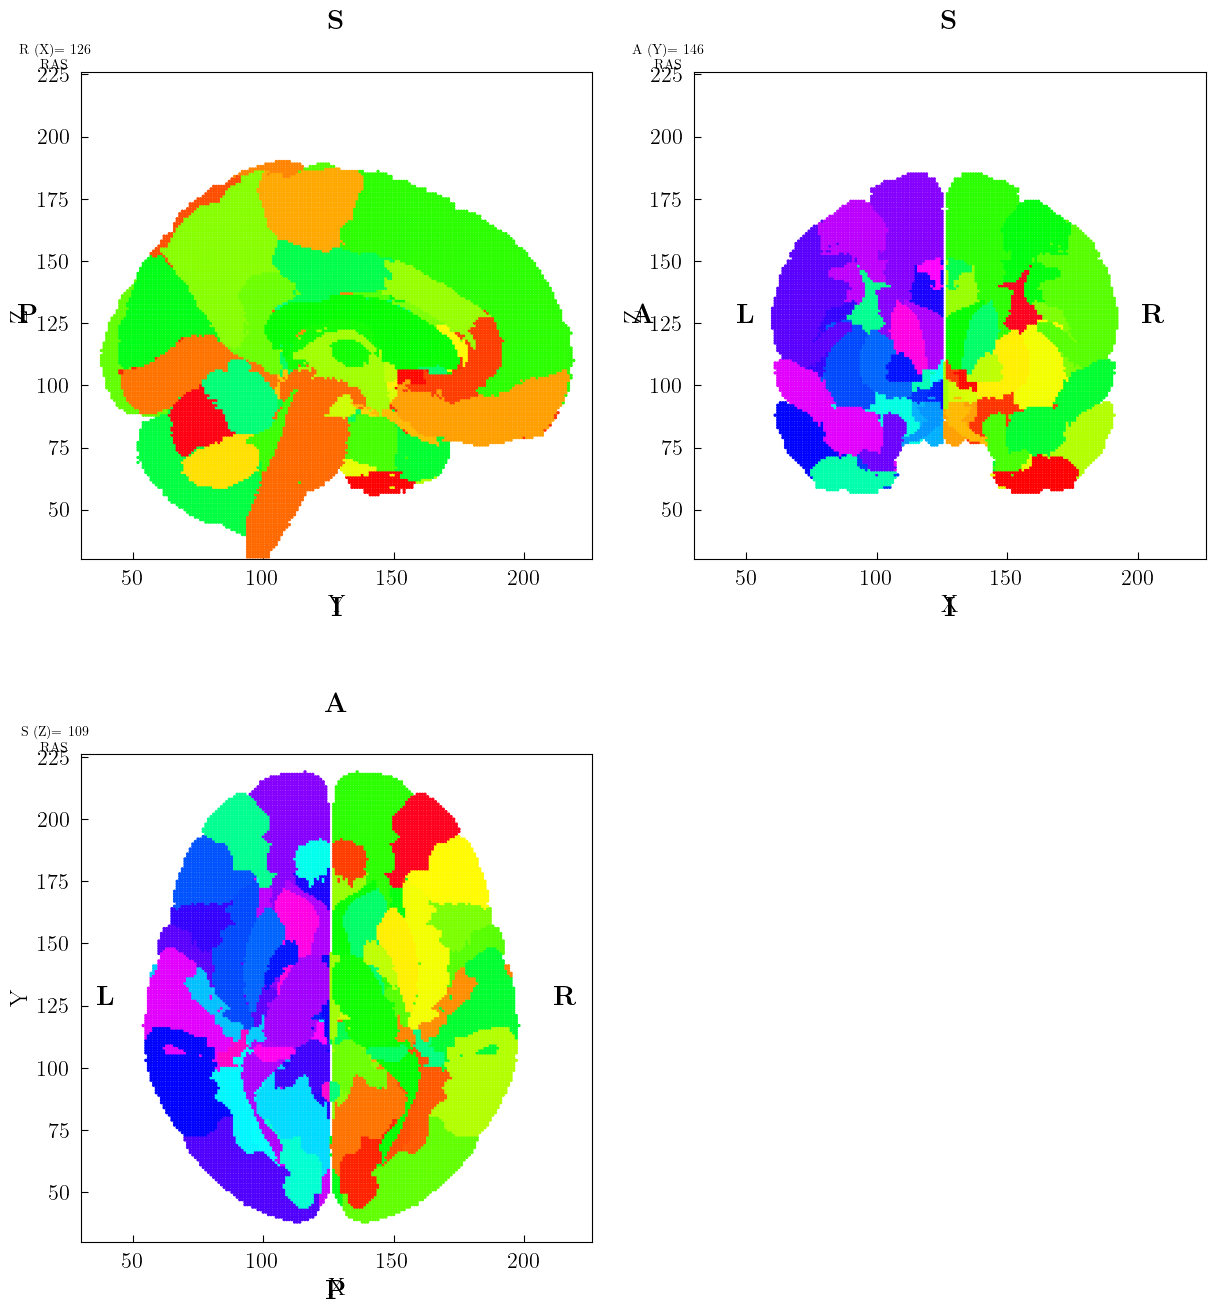

In [8]:
cerebra.orthoview()

 [WARNING] 2024-04-08 20:37:40.341 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:37:40.342 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:37:40.399 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:37:40.401 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:37:40.460 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:37:40.461 cerebra - find_region_centroid_from_id: Region centroid is outside of region?


[6, 7, 8, 9, 12, 13, 15, 16, 18, 30, 31, 33, 34, 35, 36, 38, 43, 47]
[1, 3, 7, 8, 15, 23, 24, 28, 30, 32, 35, 36, 38, 42, 45, 47, 52, 54, 58, 59, 66, 74, 75, 79, 81, 83, 86, 87, 89, 93, 96, 98]


 [WARNING] 2024-04-08 20:37:40.653 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:37:40.655 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:37:40.697 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:37:40.699 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:37:40.762 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:37:40.764 cerebra - find_region_centroid_from_id: Region centroid is outside of region?


[1, 6, 7, 8, 10, 12, 13, 14, 22, 23, 28, 30, 31, 32, 33, 34, 35, 38, 43, 44, 45, 52, 57, 58, 59, 61, 63, 64, 65, 73, 74, 79, 81, 82, 83, 84, 85, 86, 89, 94, 95, 96]
[52, 54, 61, 64, 65, 73, 75, 79, 83, 85, 86, 93, 95, 96, 102]
[3, 9, 10, 12, 13, 16, 18, 24, 28, 31, 33, 35, 45, 47, 51, 54, 60, 61, 63, 64, 67, 69, 75, 79, 82, 84, 86, 96, 98, 102]
[1, 3, 7, 12, 15, 18, 23, 24, 28, 34, 36, 44, 45, 52, 54, 58, 63, 66, 69, 74, 75, 79, 85, 87, 95, 96]


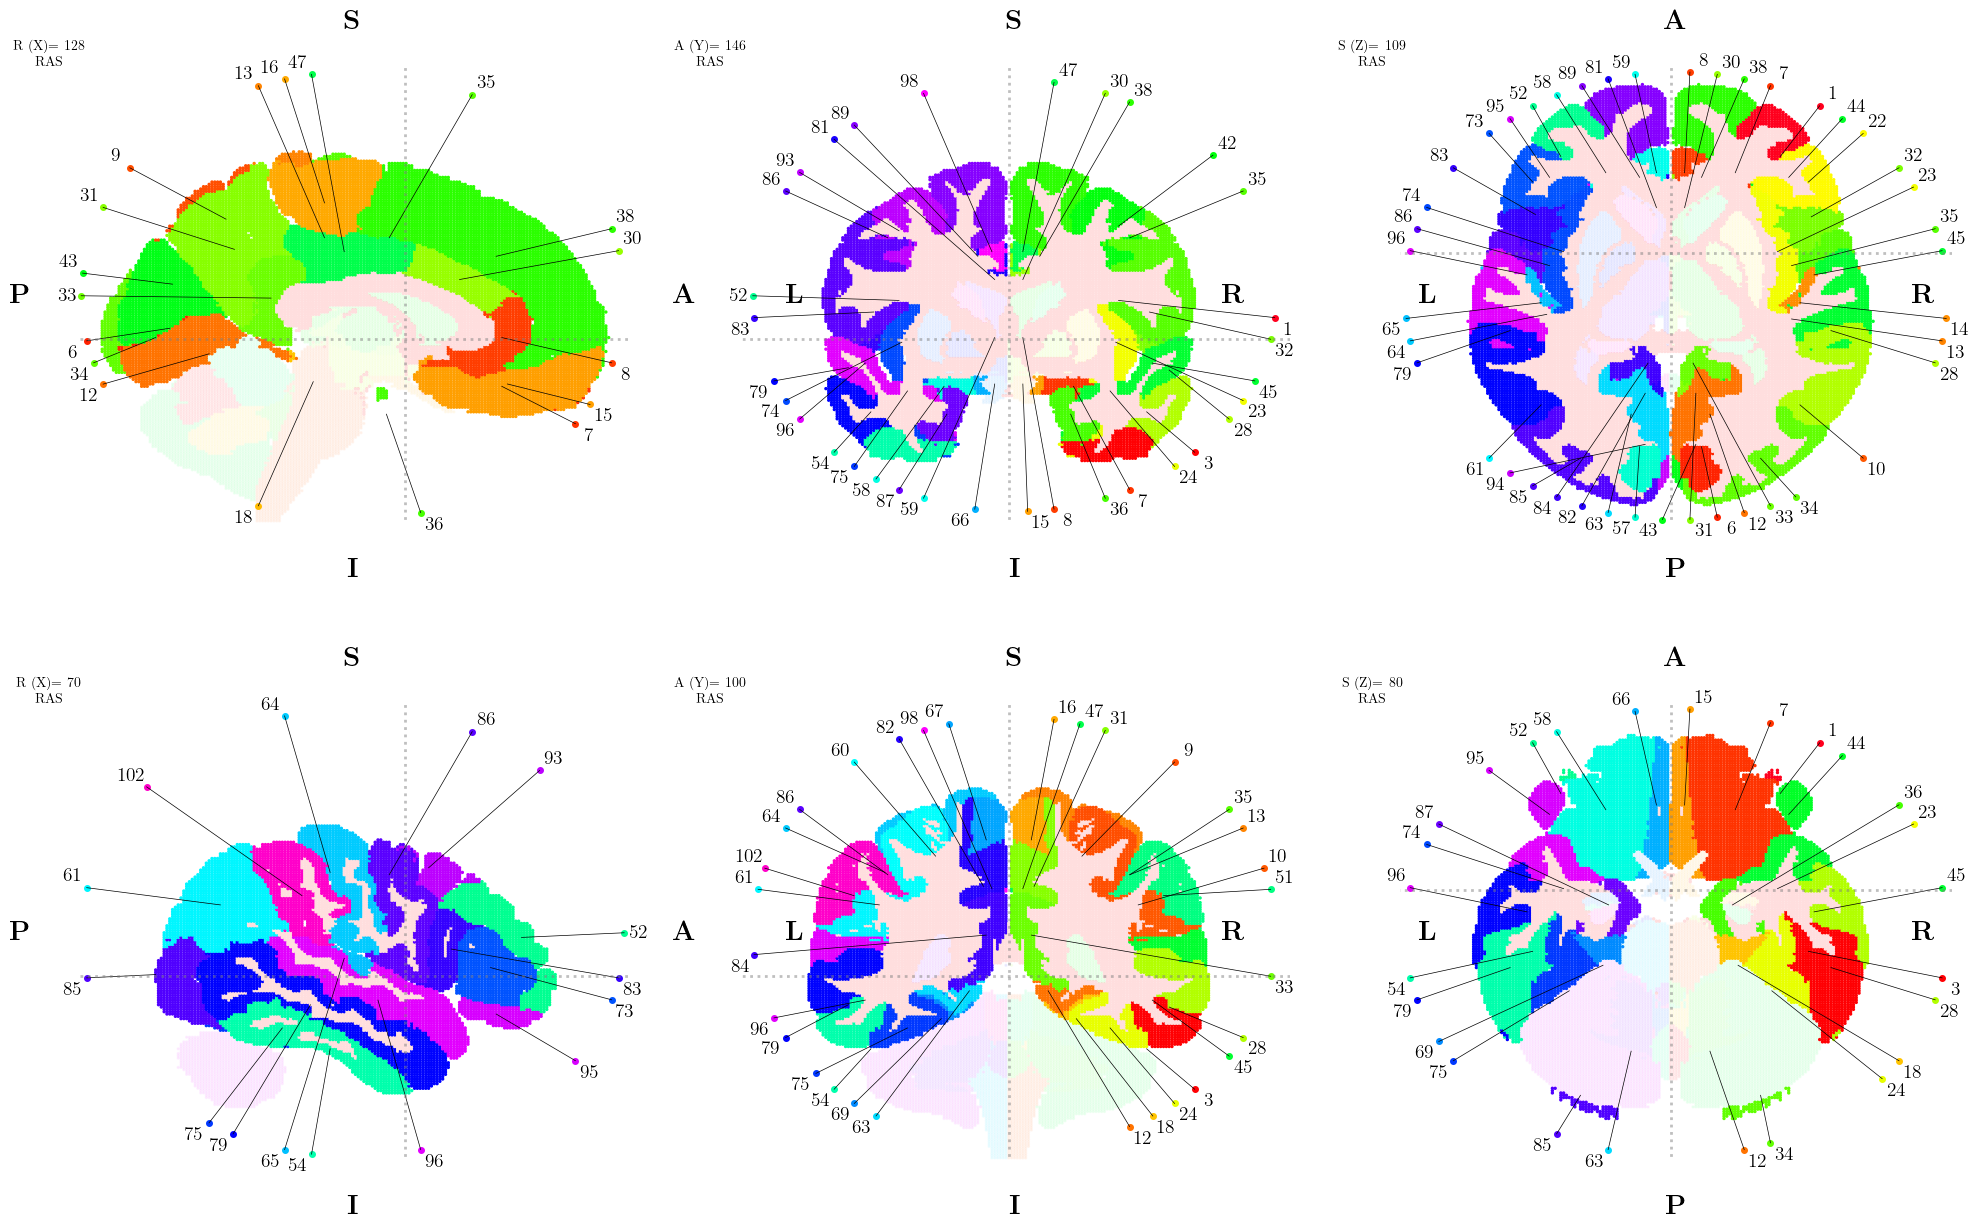

In [58]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(25, 14))

ax_h_regions = [np.array(axis_0), np.array(axis_1_filter), np.array(axis_2_filter)]
fixed_values = [128,146,109]
for ax_id in range(3):
    # highlighted_regions = cerebra.get_cortical_region_ids() if ax_id !=0 else [18,*cerebra.get_cortical_region_ids()[31:]]
    cerebra.plot_2d(n_layers=10,plot_affine=True,plot_whitematter=True,fixed_value = fixed_values[ax_id], ax=axs[0][ax_id],plot_highlighted_regions = cerebra.get_cortical_region_ids(), add_ax_labels=False, add_ax_ticks=False, add_grid=True,plot_region_names=True, axis=ax_id, add_top_left_info=True)
    # print("##################")

fixed_values = [70,100,80]

for ax_id in range(3):
    # highlighted_regions = cerebra.get_cortical_region_ids() if ax_id !=0 else [18,*cerebra.get_cortical_region_ids()[31:]]
    cerebra.plot_2d(n_layers=10,plot_affine=True,plot_whitematter=True,fixed_value = fixed_values[ax_id], ax=axs[1][ax_id],plot_highlighted_regions = cerebra.get_cortical_region_ids(), add_ax_labels=False, add_ax_ticks=False, add_grid=True,plot_region_names=True, axis=ax_id, add_top_left_info=True)



/home/carlos/Carlos/cerebra_atlas_python/cerebra_atlas_python/cerebra.py:222: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask = self.label_details["cortical"].fillna(False)
 [WARNING] 2024-04-08 20:32:27.158 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:32:27.159 cerebra - find_region_centroid_from_id: Region centroid is outside of region?


 [WARNING] 2024-04-08 20:32:27.202 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:32:27.203 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:32:27.374 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 20:32:27.375 cerebra - find_region_centroid_from_id: Region centroid is outside of region?


[52, 54, 61, 64, 65, 73, 75, 79, 83, 85, 86, 93, 95, 96, 102]
[3, 9, 10, 12, 13, 16, 18, 24, 28, 31, 33, 35, 45, 47, 51, 54, 60, 61, 63, 64, 67, 69, 75, 79, 82, 84, 86, 96, 98, 102]
[1, 3, 7, 12, 15, 18, 23, 24, 28, 34, 36, 44, 45, 52, 54, 58, 63, 66, 69, 74, 75, 79, 85, 87, 95, 96]


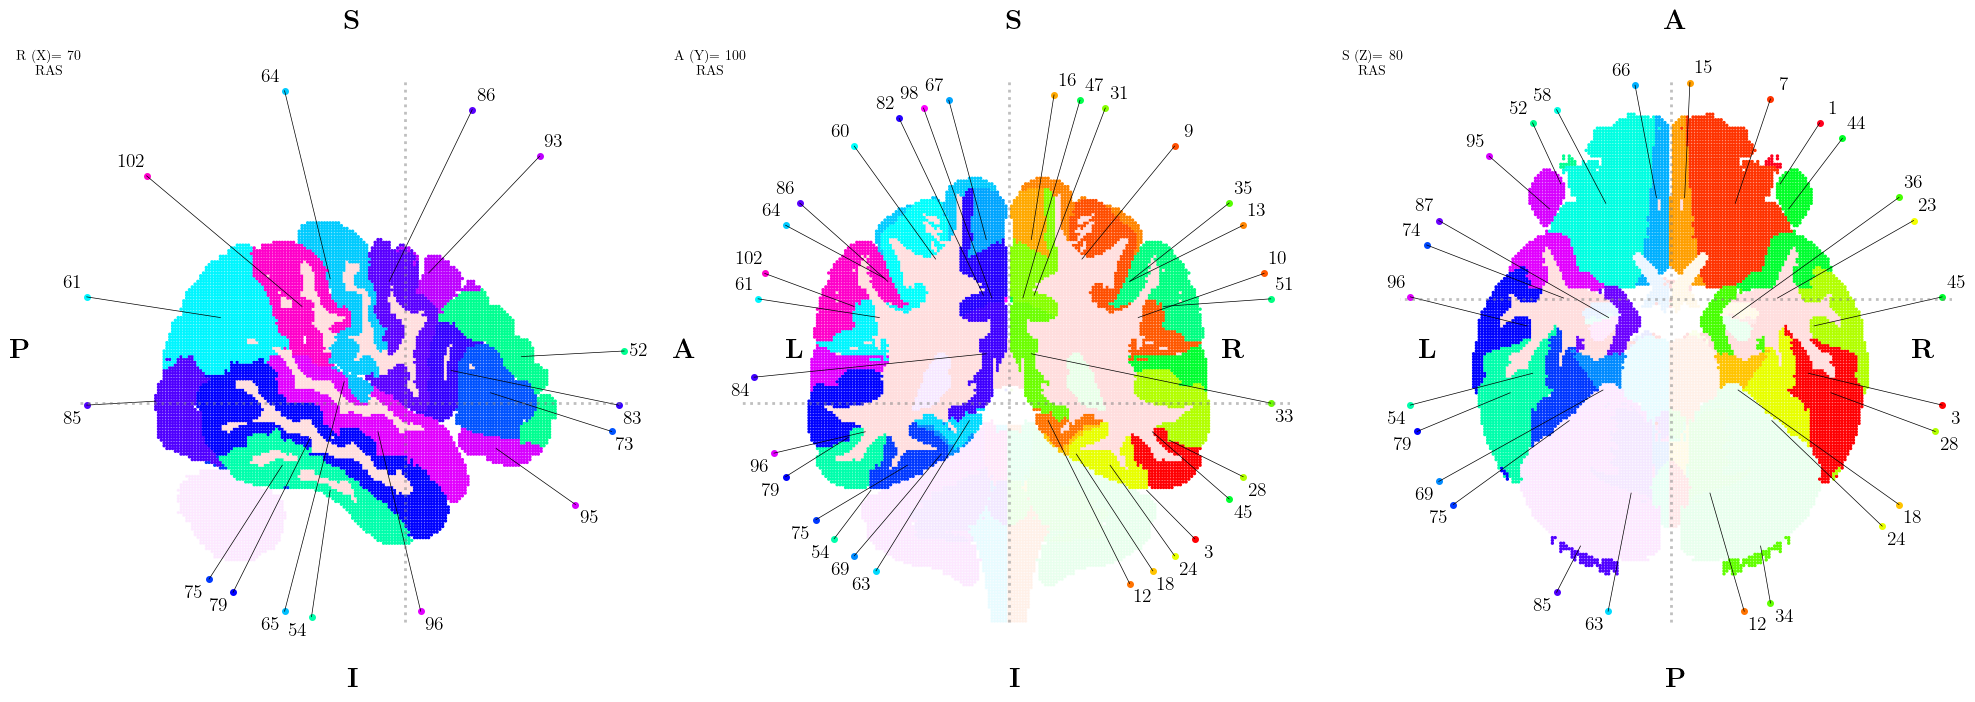

In [54]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(25, 7))

ax_h_regions = [np.array(axis_0), np.array(axis_1_filter), np.array(axis_2_filter)]
fixed_values = [70,100,80]

for ax_id in range(3):
    # highlighted_regions = cerebra.get_cortical_region_ids() if ax_id !=0 else [18,*cerebra.get_cortical_region_ids()[31:]]
    cerebra.plot_2d(n_layers=10,plot_affine=True,plot_whitematter=True,fixed_value = fixed_values[ax_id], ax=axs[ax_id],plot_highlighted_regions = cerebra.get_cortical_region_ids(), add_ax_labels=False, add_ax_ticks=False, add_grid=True,plot_region_names=True, axis=ax_id, add_top_left_info=True)


In [55]:
shown = np.concatenate([[6, 7, 8, 9, 12, 13, 15, 16, 18, 30, 31, 33, 34, 35, 36, 38, 43, 47],
[1, 3, 7, 8, 15, 23, 24, 28, 30, 32, 35, 36, 38, 42, 45, 47, 52, 54, 58, 59, 66, 74, 75, 79, 81, 83, 86, 87, 89, 93, 96, 98],
[1, 6, 7, 8, 10, 12, 13, 14, 22, 23, 28, 30, 31, 32, 33, 34, 35, 38, 43, 44, 45, 52, 57, 58, 59, 61, 63, 64, 65, 73, 74, 79, 81, 82, 83, 84, 85, 86, 89, 94, 95, 96],
[52, 54, 61, 64, 65, 73, 75, 79, 83, 85, 86, 93, 95, 96, 102],
[3, 9, 10, 12, 13, 16, 18, 24, 28, 31, 33, 35, 45, 47, 51, 54, 60, 61, 63, 64, 67, 69, 75, 79, 82, 84, 86, 96, 98, 102],
[1, 3, 7, 12, 15, 18, 23, 24, 28, 34, 36, 44, 45, 52, 54, 58, 63, 66, 69, 74, 75, 79, 85, 87, 95, 96]],
)
not_list=[]
for c in cerebra.get_cortical_region_ids():
    if c not in shown:
        print(c)
        not_list.append(c)
print(not_list)

[]


[51, 67]
[51, 67]
[51, 67]


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

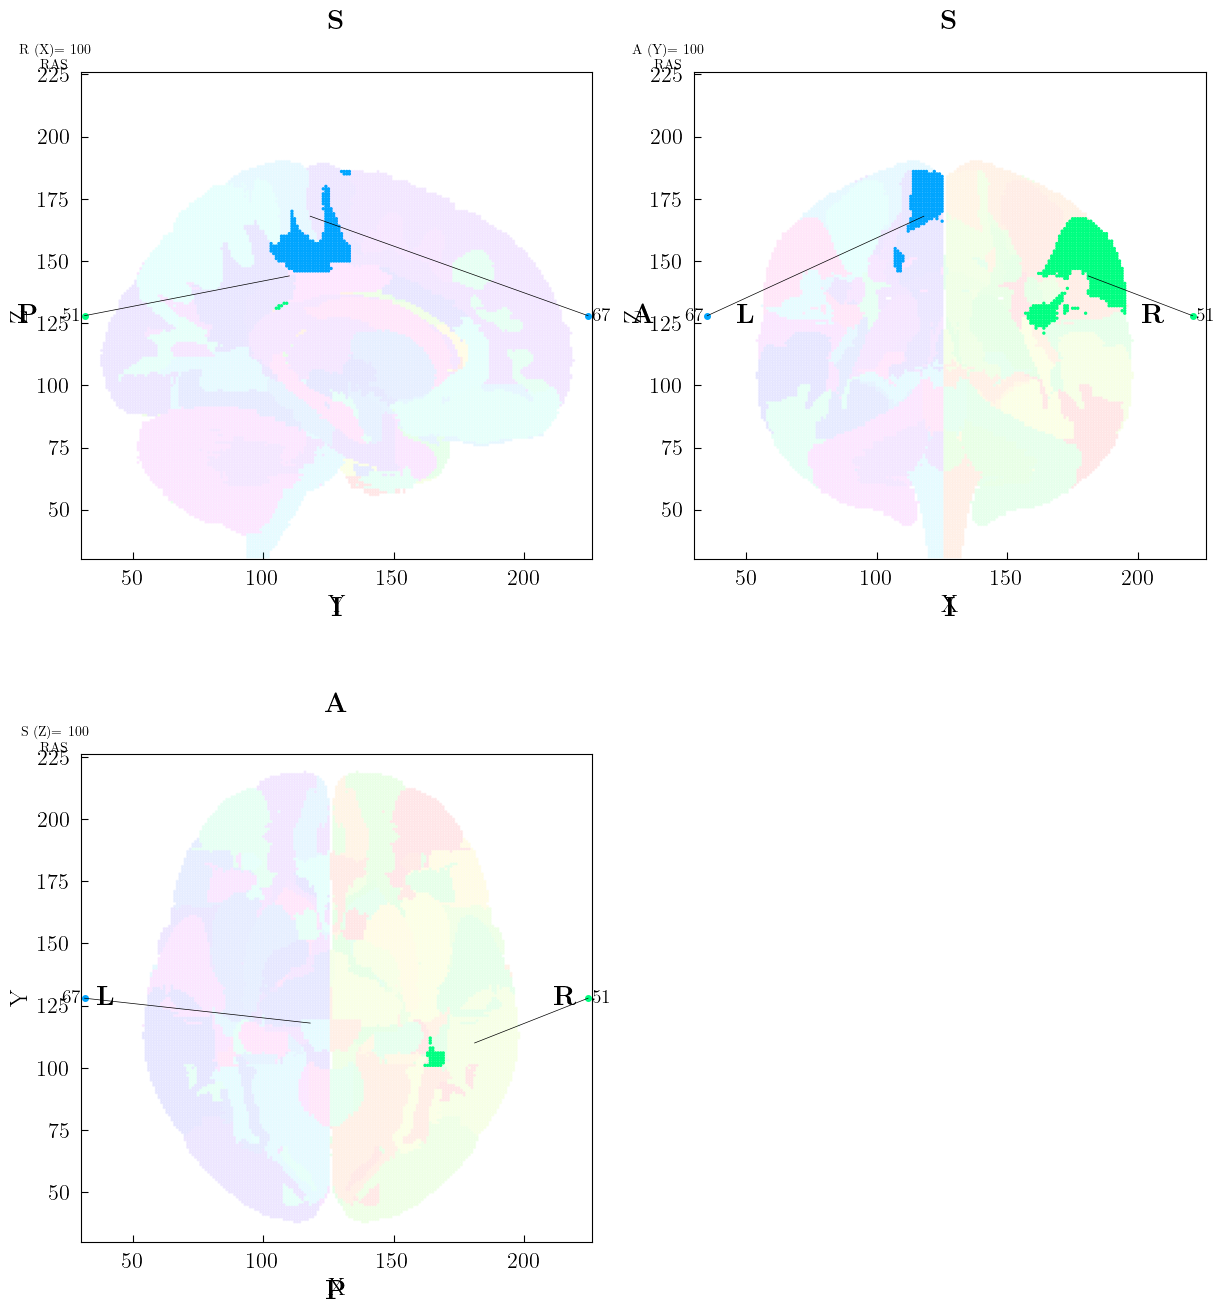

In [53]:
cerebra.orthoview(plot_highlighted_regions=not_list,plot_region_names=True, fixed_value=100)

In [59]:
len(cerebra.get_cortical_region_ids())

/home/carlos/Carlos/cerebra_atlas_python/cerebra_atlas_python/cerebra.py:222: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask = self.label_details["cortical"].fillna(False)


62

/home/carlos/Carlos/cerebra_atlas_python/cerebra_atlas_python/cerebra.py:222: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask = self.label_details["cortical"].fillna(False)
 [WARNING] 2024-04-08 17:55:30.38 cerebra - find_region_centroid_from_id: Region centroid is outside of region?
 [WARNING] 2024-04-08 17:55:30.40 cerebra - find_region_centroid_from_id: Region centroid is outside of region?


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

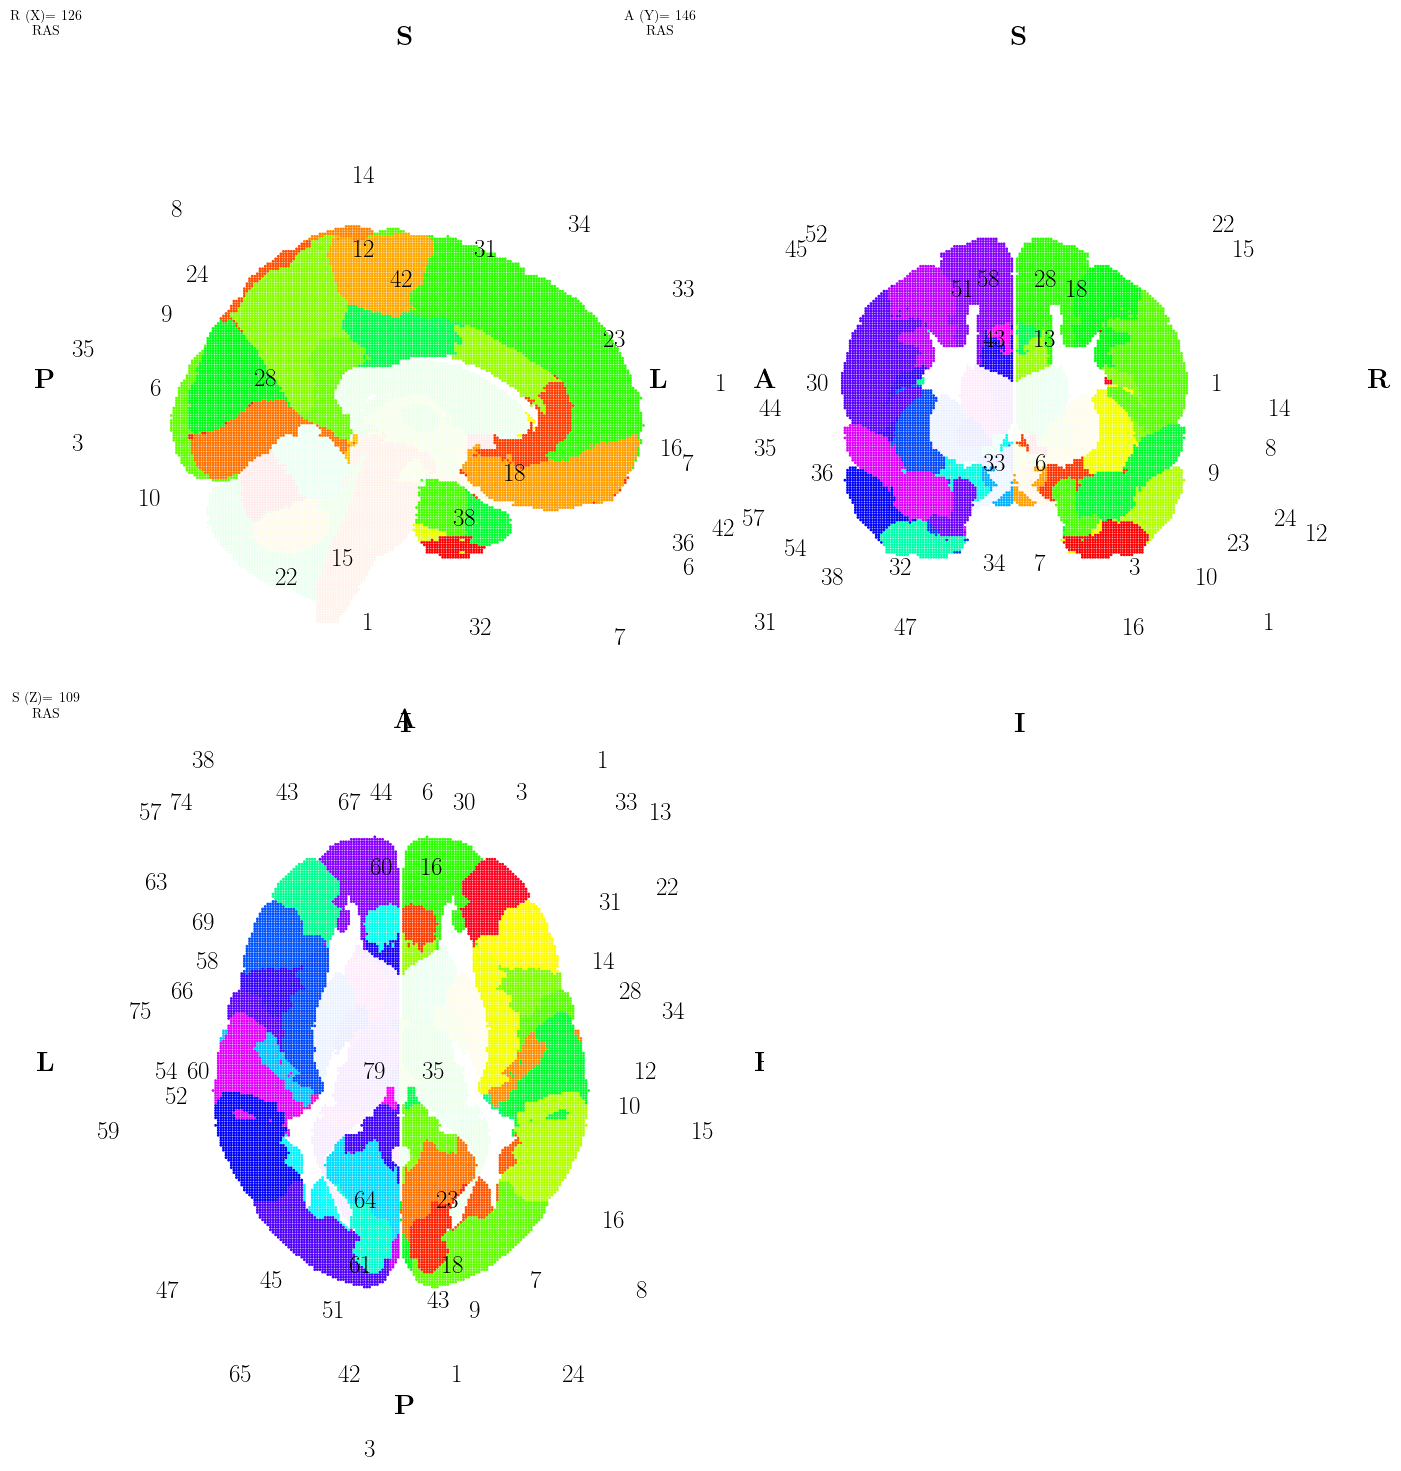

In [27]:
cerebra.orthoview(plot_highlighted_regions = cerebra.get_cortical_region_ids(),n_layers=30, add_ax_labels=False, add_ax_ticks=False, add_grid=True)

In [1]:
cerebra.plot_2d()

NameError: name 'cerebra' is not defined

(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

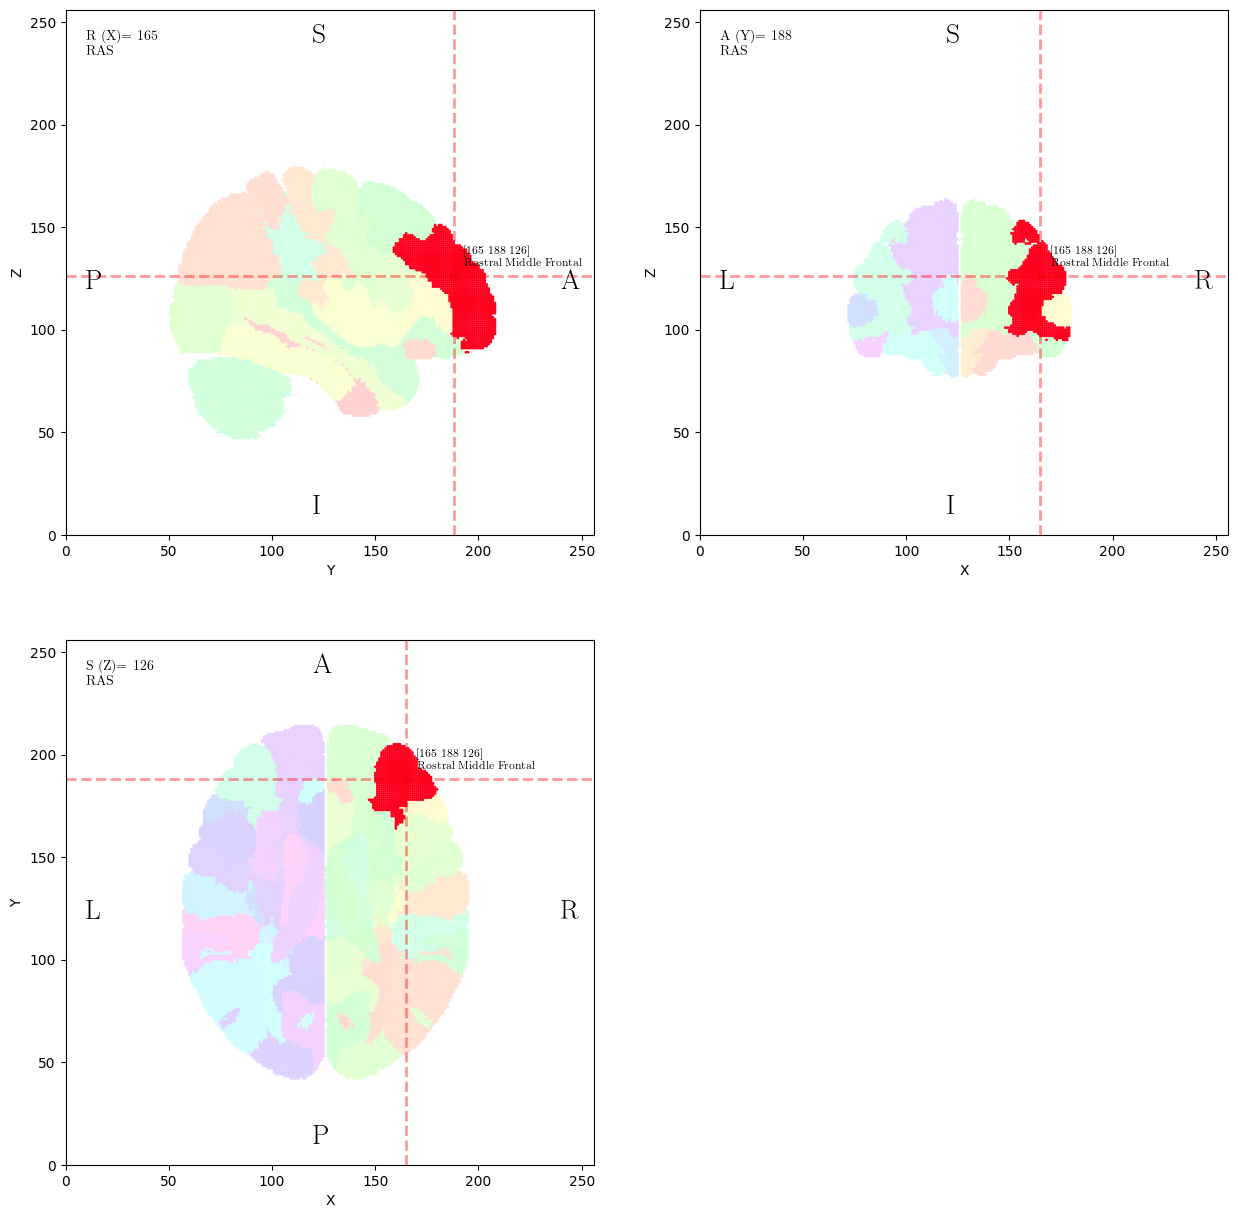

In [7]:
cerebra.orthoview(plot_highlighted_region=1)

/home/carlos/Carlos/cerebra_atlas_python/cerebra_atlas_python/cerebra.py:222: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask = self.label_details["cortical"].fillna(False)


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

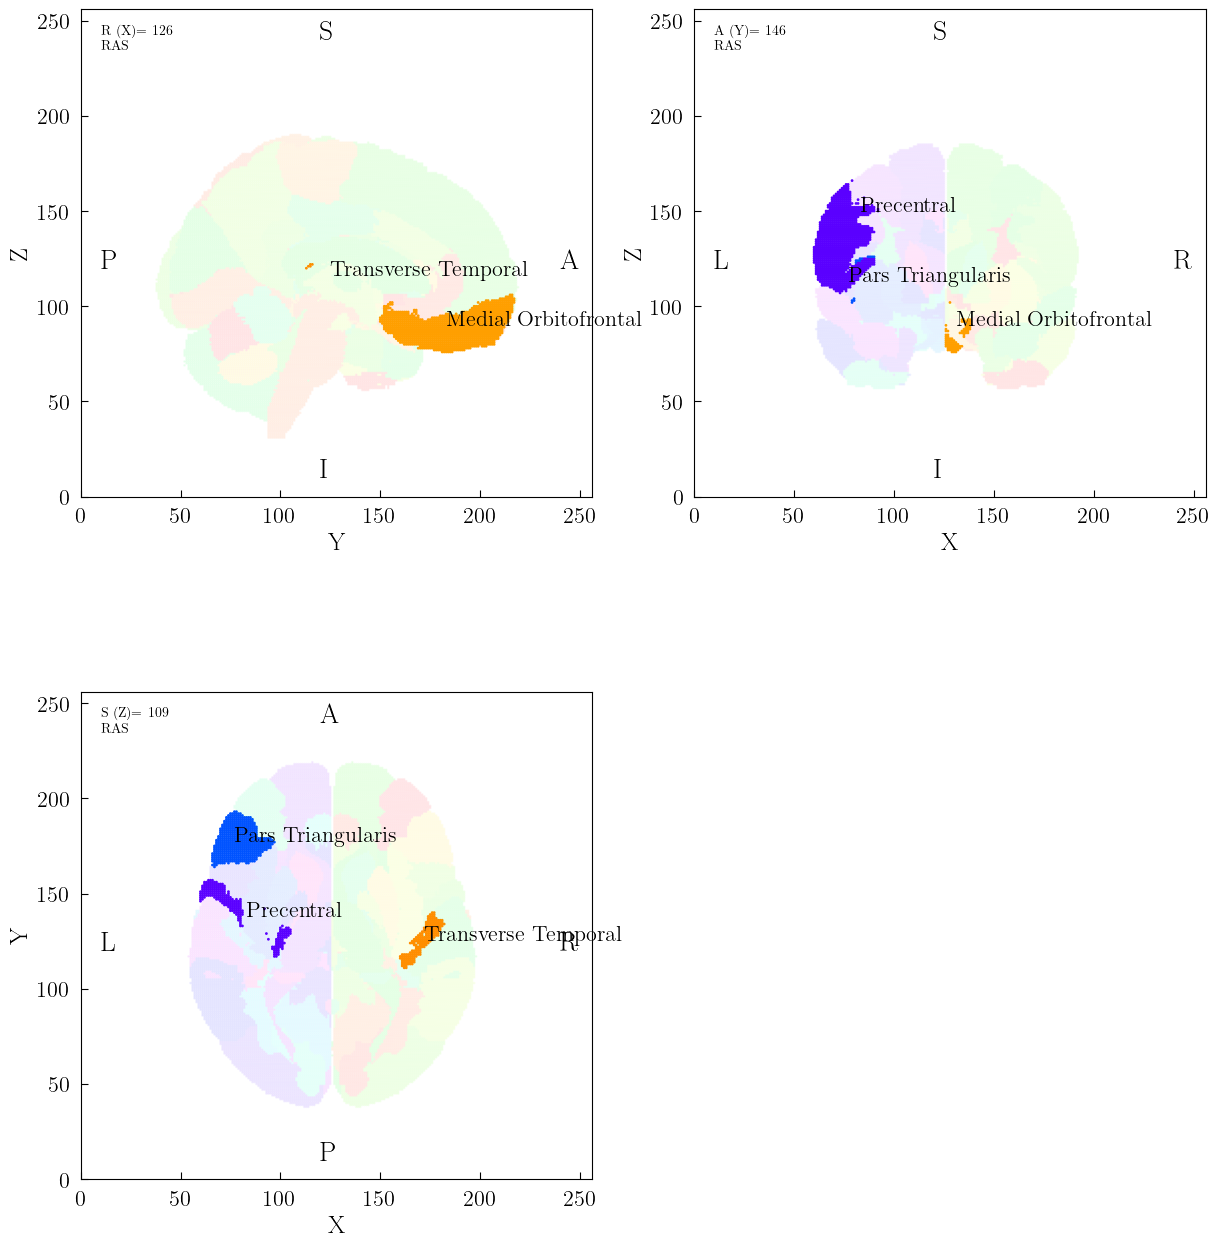

In [48]:
cortical_region_ids = [9, 10, 53, 44]
region_ids = [cerebra.get_cortical_region_ids()[r] for r in cortical_region_ids]
cerebra.orthoview(plot_highlighted_regions=region_ids)

In [ ]:
cerebra.bem

 [INFO] 2024-04-03 13:12:02.815 mni_average - _set_bem: Generating boundary element model... | bem_0.33_0.0042_0.33_ico_4


KeyboardInterrupt: 

In [ ]:
%%time
cerebra.src_space_points

AttributeError: 'CerebraMNE' object has no attribute '_src_space_points_path'

In [ ]:
%%time
cerebra.cerebra_sparse

AttributeError: 'CerebraMNE' object has no attribute '_cerebra_sparse_path'

In [ ]:
%time
cerebra.src_space_points

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.34 µs


AttributeError: 'CerebraMNE' object has no attribute '_src_space_points_path'

In [ ]:
cerebra.config_path

'../cerebra_atlas_python/config.ini'

In [4]:
setup_logging("DEBUG")

In [22]:
%%time
cerebra = CerebraMNE(config_path='../cerebra_atlas_python/config.ini')

CPU times: user 606 µs, sys: 4.85 ms, total: 5.45 ms
Wall time: 5.22 ms


In [25]:
cerebra.bem

 [INFO] 2024-03-27 23:11:36.77 mni_average - _set_bem: Generating boundary element model... | bem_0.33_0.0042_0.33_ico_4


<ConductorModel | BEM (3 layers) solver=mne>

In [ ]:
%%time
cerebra.src_space_points

AttributeError: 'CerebraMNE' object has no attribute '_src_space_points_path'

In [ ]:
%%time
cerebra.cerebra_sparse

AttributeError: 'CerebraMNE' object has no attribute '_cerebra_sparse_path'

In [ ]:
%time
cerebra.src_space_points

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.34 µs


AttributeError: 'CerebraMNE' object has no attribute '_src_space_points_path'

In [ ]:
cerebra.config_path

'../cerebra_atlas_python/config.ini'

In [ ]:
cerebra.src_space_mask

In [ ]:
cerebra.config_path

'../cerebra_atlas_python/config.ini'

In [ ]:
from cerebra_atlas_python import CerebrA
cerebra = CerebrA()
cerebra.orthoview(pt=[],plot_affine=True)

IndexError: index 0 is out of bounds for axis 0 with size 0

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X (R)', ylabel='Y (A)', zlabel='Z (S)'>)

 [DEBUG] 2024-03-27 19:05:21.371 PngImagePlugin - call: STREAM b'IHDR' 16 13
 [DEBUG] 2024-03-27 19:05:21.372 PngImagePlugin - call: STREAM b'PLTE' 41 48
 [DEBUG] 2024-03-27 19:05:21.372 PngImagePlugin - call: STREAM b'tRNS' 101 15
 [DEBUG] 2024-03-27 19:05:21.372 PngImagePlugin - call: STREAM b'pHYs' 128 9
 [DEBUG] 2024-03-27 19:05:21.372 PngImagePlugin - call: STREAM b'IDAT' 149 374
 [DEBUG] 2024-03-27 19:05:21.377 PngImagePlugin - call: STREAM b'IHDR' 16 13
 [DEBUG] 2024-03-27 19:05:21.377 PngImagePlugin - call: STREAM b'PLTE' 41 48
 [DEBUG] 2024-03-27 19:05:21.378 PngImagePlugin - call: STREAM b'tRNS' 101 15
 [DEBUG] 2024-03-27 19:05:21.378 PngImagePlugin - call: STREAM b'pHYs' 128 9
 [DEBUG] 2024-03-27 19:05:21.378 PngImagePlugin - call: STREAM b'IDAT' 149 358
 [DEBUG] 2024-03-27 19:05:21.383 PngImagePlugin - call: STREAM b'IHDR' 16 13
 [DEBUG] 2024-03-27 19:05:21.384 PngImagePlugin - call: STREAM b'PLTE' 41 48
 [DEBUG] 2024-03-27 19:05:21.384 PngImagePlugin - call: STREAM b'tRNS'

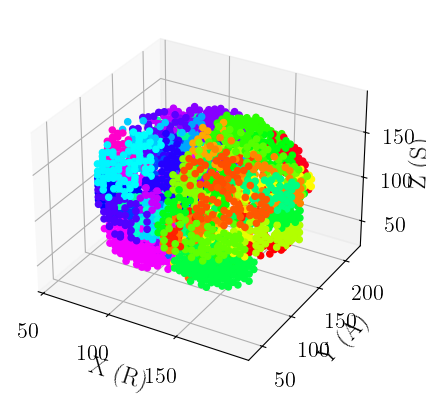

In [ ]:
cerebra.plot_3d()

 [DEBUG] 2024-03-27 19:03:32.365 utils - slice_volume: start_slice=126  end_slice=226  increment=1 


 [DEBUG] 2024-03-27 19:03:32.528 utils - slice_volume: start_slice=146  end_slice=246  increment=1 
 [DEBUG] 2024-03-27 19:03:32.631 utils - slice_volume: start_slice=109  end_slice=209  increment=1 


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

 [DEBUG] 2024-03-27 19:03:32.707 PngImagePlugin - call: STREAM b'IHDR' 16 13
 [DEBUG] 2024-03-27 19:03:32.707 PngImagePlugin - call: STREAM b'PLTE' 41 45
 [DEBUG] 2024-03-27 19:03:32.708 PngImagePlugin - call: STREAM b'tRNS' 98 14
 [DEBUG] 2024-03-27 19:03:32.708 PngImagePlugin - call: STREAM b'pHYs' 124 9
 [DEBUG] 2024-03-27 19:03:32.708 PngImagePlugin - call: STREAM b'IDAT' 145 74
 [DEBUG] 2024-03-27 19:03:32.709 PngImagePlugin - call: STREAM b'IHDR' 16 13
 [DEBUG] 2024-03-27 19:03:32.709 PngImagePlugin - call: STREAM b'PLTE' 41 48
 [DEBUG] 2024-03-27 19:03:32.710 PngImagePlugin - call: STREAM b'tRNS' 101 15
 [DEBUG] 2024-03-27 19:03:32.710 PngImagePlugin - call: STREAM b'pHYs' 128 9
 [DEBUG] 2024-03-27 19:03:32.710 PngImagePlugin - call: STREAM b'IDAT' 149 143
 [DEBUG] 2024-03-27 19:03:32.711 PngImagePlugin - call: STREAM b'IHDR' 16 13
 [DEBUG] 2024-03-27 19:03:32.712 PngImagePlugin - call: STREAM b'PLTE' 41 48
 [DEBUG] 2024-03-27 19:03:32.712 PngImagePlugin - call: STREAM b'tRNS' 1

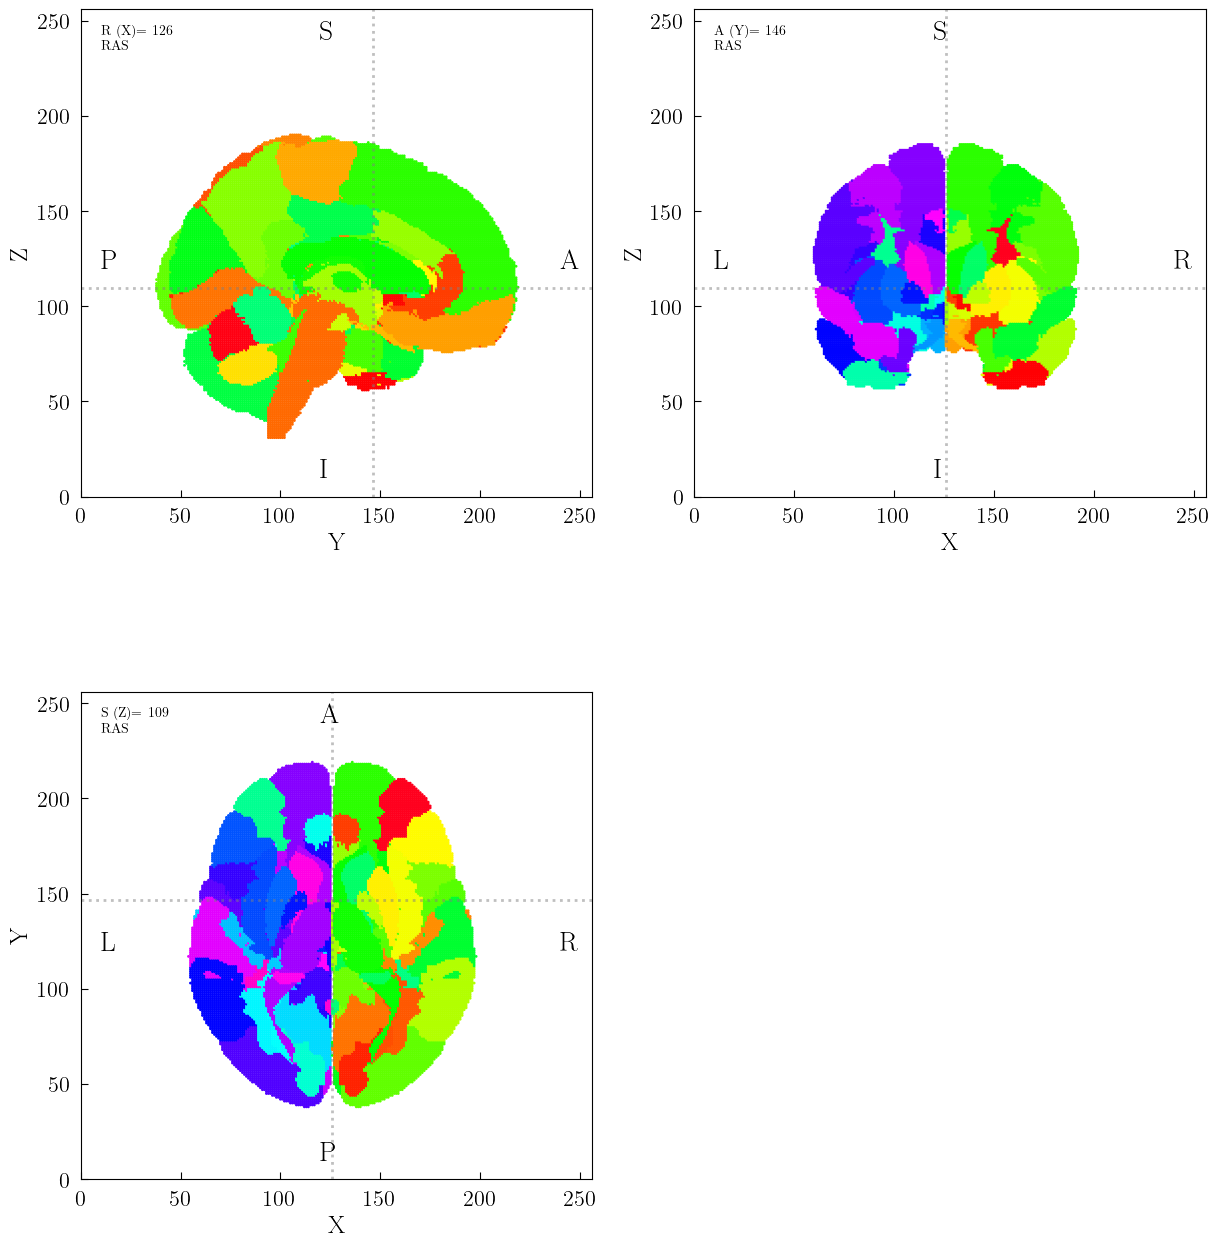

In [ ]:
cerebra.orthoview(plot_affine=True)

In [ ]:


import os
import os.path as op
import logging
from abc import ABC
import mne
from cerebra_atlas_python.config import Config
# from core.data.montage import get_info, get_montage


def get_forward(trans=None, src_space=None, bem=None, info=None, meg=False, eeg=True, n_jobs=-1):
    # if info is None:
    #     info = get_info()
    if (trans is None) or (src_space is None) or (bem is None):
        fs_dir = mne.datasets.fetch_fsaverage()
        trans_fif_path = os.path.join(fs_dir, 'bem', 'fsaverage-trans.fif')
        src_fif_path = os.path.join(fs_dir, 'bem', 'fsaverage-ico-5-src.fif')
        bem_fif_path = os.path.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')

        if trans is None:
            logging.warning("trans not provided, using fsaverage")
            trans = trans_fif_path
        if src_space is None:
            logging.warning("src_space not provided, using fsaverage")
            # src = mne.setup_source_space(subject, spacing=sampling, surface='white',
            #                         subjects_dir=subjects_dir, add_dist=False,
            #                         n_jobs=-1)
            src_space = src_fif_path
        if bem is None:
            logging.warning("bem not provided, using fsaverage")
            bem = bem_fif_path

    fwd = mne.make_forward_solution(
                info,
                trans=trans,
                src=src_space,
                bem=bem,
                meg=meg,
                eeg=eeg,
                n_jobs=n_jobs,
            )

    return fwd


class Forward(Config, ABC):
    def __init__(self, **kwargs):
        self.forward_output_path: str = "./forward_models"
        self.fixed_ori: str = False
        self.meg: bool = False
        self.eeg: bool = True
        self.n_jobs: bool = -1
        self.save:bool = True
        self.montage_name: str = "GSN-HydroCel-129-downsample-111"
        self.head_size: float = 0.108

        Config.__init__(self,
            class_name=self.__class__.__name__,
            **kwargs,
        )

        # These attributes should be set by parent class before calling get_forward
        self.trans = None
        self.src_space = None
        self.bem = None

        self._info = None

        # Avoid recomputing/reloading fwd solution from disk
        self._cached_fwd = None
        self._cached_fwd_name = None

    def __str__(self):
        return f"{self.montage_name}-hs{self.head_size}"

    @property
    def file_name(self):
        return f"{self.forward_output_path}/{str(self)}-fwd.fif"


class CerebraForward(Forward):
    def __init__(self,cerebra=None,
        CerebraKwArgs=None,montage_name='GSN-HydroCel-129-downsample-109', head_size=0.1027,**kwargs):
        super().__init__(montage_name=montage_name,head_size=head_size,**kwargs)
        if cerebra is None:
            CerebraKwArgs = CerebraKwArgs or {}
            self.cerebra = CerebrA(**CerebraKwArgs)
        else:
            assert isinstance(
                cerebra, CerebrA
            ), f"Wrong class should be CerebrA {type(cerebra)= }"

    def __str__(self):
        return "cerebra-"+super().__str__()
    
    def set_info(self, info):
        self.info = info
    
    def get_forward(self):
        self.trans = self.cerebra.mni_average.head_mri_t
        self.src_space = self.cerebra.src_space
        self.bem = self.cerebra.mni_average.bem
        return super().get_forward()
    

In [ ]:
from cerebra_atlas_python.utils import setup_logging
setup_logging("DEBUG")

In [ ]:
cerebra.src_space

[autoreload of cerebra_atlas_python.mni_average failed: Traceback (most recent call last):
  File "/home/carlos/anaconda3/envs/cerebra/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/carlos/anaconda3/envs/cerebra/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/home/carlos/anaconda3/envs/cerebra/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/carlos/Carlos/cerebra_atlas_python

<SourceSpaces: [<discrete, n_used=31610>] MRI (surface RAS) coords, ~1.6 MB>

In [ ]:
fwd = mne.make_forward_solution(
            info,
            trans=trans,
            src=src_space,
            bem=bem,
            meg=meg,
            eeg=eeg,
            n_jobs=n_jobs,
        )

NameError: name 'info' is not defined

In [ ]:
cerebra_forward = CerebraForward(cerebra=cerebra)

In [ ]:
cerebra_forward.get_forward()

AttributeError: 'CerebraForward' object has no attribute 'cerebra'